In [1]:
library(ggplot2)
library(dplyr)
library(gplots)
library(pvclust)
library(reshape2)
library(umap)
library(ggExtra) 
library(pals)
library(RColorBrewer)
library(ComplexHeatmap)
library(circlize)
library(heatmap.plus)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Loading required package: grid

ComplexHeatmap version 2.18.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessage

In [2]:
filtered <- read.table("../7614_final_summary_anno3.txt",header=T,sep="\t")
variant_list <- read.csv("../variant_annotation/287_variant_annotation_bulk_sort_COUPTF2_TBR1_DLX1_CBH.csv",header=T,sep=",", row.names = 1)
filtered$Punch<-as.character(filtered$Punch)
filtered$Note<-as.character(filtered$Note)
mosaic_filtered <- filtered[filtered$Mosaic_shared_btw_WGS_Amp==1,] #Use 269 variants. assign this to mosaic_filtered
shared_variant_list<-variant_list[variant_list$sample_number_presented>1,]
shared_mosaic_filtered<-mosaic_filtered[mosaic_filtered$CHROM.POS.REF.ALT %in% rownames(shared_variant_list),]

# Figure 3 var x sample heatmap

In [3]:
melt_mtcars<-mosaic_filtered[,c("ID", "CHROM.POS.REF.ALT", "MAF", "Hemisphere", "Organ", "Region","Sort_main", "Cell_Type")]
melt_mtcars<-na.omit(melt_mtcars)
melt_mtcars<-na.omit(melt_mtcars[melt_mtcars$CHROM.POS.REF.ALT %in% variant_list[variant_list$sample_number_presented>1,]$variant_list,])
melt_mtcars<-melt_mtcars[melt_mtcars$Sort_main %in% c('1'),]
melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('COUPTF2','DLX1','TBR1'),]
melt_mtcars<-melt_mtcars[(melt_mtcars$Organ %in% c('CTX')),]

#melt_mtcars<-melt_mtcars[(melt_mtcars$Organ %in% c('CTX','BG','AMG','HIP','THAL','SUB','CLO')),]
#melt_mtcars<-melt_mtcars[!melt_mtcars$Region %in% c('PF'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Hemisphere %in% c('R'),]
# melt_mtcars<-melt_mtcars[!melt_mtcars$Punch %in% c("35","36","37","72","73","74","75"),]
# melt_mtcars<-melt_mtcars[!(melt_mtcars$Punch %in% c("34") & melt_mtcars$Cell_Type %in% c("TBR1")),]
melt_mtcars$MAF <- sqrt(melt_mtcars$MAF)

In [4]:
melt_mtcars<-na.omit(melt_mtcars)

In [5]:
length(unique(melt_mtcars$CHROM.POS.REF.ALT))

[1] 146

In [6]:
casted_MAF_VarBySample <- dcast(melt_mtcars, ID+Hemisphere+Region+Organ+Cell_Type~CHROM.POS.REF.ALT, value.var = "MAF", rm.na=T)
rownames(casted_MAF_VarBySample) <- casted_MAF_VarBySample$ID
casted_MAF_VarBySample2 <- casted_MAF_VarBySample[,-1]
nrow(casted_MAF_VarBySample2)
unique(casted_MAF_VarBySample2$Hemisphere)
unique(casted_MAF_VarBySample2$Organ)
unique(casted_MAF_VarBySample2$Region)
unique(casted_MAF_VarBySample2$Cell_Type)

[1] 35

[1] "L" "R"

[1] "CTX"

[1] "Ins" "F"   "O"   "P"   "PF"  "T"

[1] "COUPTF2" "DLX1"    "TBR1"

In [7]:
Normalized_casted_MAF_VarBySample2<-t(na.omit(t(casted_MAF_VarBySample2[,-1:-4])))

In [8]:
Normalized_casted_MAF_VarBySample2

,1-106934533-C-T,1-168467950-G-A,1-169329191-G-A,1-188748555-G-A,1-221888654-T-C,1-241434408-C-T,1-31691734-G-A,1-64512024-C-T,1-98426749-G-A,10-116196503-C-T,⋯,9-9457115-T-A,X-10480747-T-A,X-117352547-A-T,X-124310752-C-T,X-130898293-A-G,X-130898294-C-T,X-138175923-C-T,X-141942973-G-A,X-54739596-C-G,X-77453233-C-T
7614-L-9-Ins-COUPTF2,0.07815130,0.022908106,0.089511307,0.01795860,0.10690283,0.01279687,0.03376632,0.08802140,0.013438870,0.05749786,⋯,0.06689300,0.061665136,0.039539505,0.020957408,0.04005612,0.03351066,0.01480385,0.02077570,0.03690439,0.08993825
7614-L-9-Ins-DLX1,0.10901145,0.020215948,0.085973474,0.08746831,0.06911501,0.02784470,0.02126793,0.04064028,0.036655210,0.04068036,⋯,0.06770829,0.018403696,0.023795425,0.026704674,0.04842175,0.04844637,0.01152475,0.01825590,0.04851303,0.08494195
7614-L-9-Ins-TBR1,0.12320886,0.020399669,0.083703160,0.03135565,0.05894831,0.03008532,0.02165740,0.01463014,0.045185420,0.03005294,⋯,0.09649154,0.014843484,0.000000000,0.018826083,0.03842565,0.02645046,0.02100613,0.02002726,0.04485162,0.02190277
7614-L-F-34-DLX1,0.02716518,0.016947692,0.118614337,0.03861896,0.10787218,0.02081978,0.02242619,0.01084908,0.016700721,0.02721454,⋯,0.08795542,0.132938600,0.007528166,0.000000000,0.02855395,0.02213043,0.01872843,0.02132201,0.04365262,0.04362827
7614-L-F-COUPTF2,0.05965205,0.008699929,0.090766086,0.02329996,0.14973343,0.02732557,0.02321713,0.07786434,0.014598151,0.06247730,⋯,0.01342675,0.056002968,0.108539677,0.010374538,0.04066885,0.03588470,0.02133462,0.02556828,0.04749643,0.11271682
7614-L-F-TBR1,0.02604902,0.025615776,0.109840635,0.02769362,0.08891821,0.02105246,0.02514500,0.01588302,0.077964032,0.02797271,⋯,0.09490178,0.146642394,0.006687804,0.053464683,0.07165188,0.06846081,0.01865334,0.01162241,0.06271644,0.01841274
7614-L-O-COUPTF2,0.08916933,0.026552052,0.018645233,0.01554269,0.06843209,0.02572938,0.04334133,0.09540187,0.000000000,0.10444659,⋯,0.05028894,0.049077876,0.048545691,0.013875512,0.03419261,0.02498439,0.01899571,0.01338339,0.05667227,0.10408718
7614-L-O-DLX1,0.06202993,0.017050272,0.081621900,0.07435605,0.07038736,0.02404496,0.02280990,0.04426122,0.015371887,0.01852222,⋯,0.10771133,0.014629100,0.016971106,0.022895999,0.05782569,0.05042982,0.02305470,0.02499219,0.04938497,0.13711606
7614-L-O-TBR1,0.05071179,0.018270619,0.075847956,0.04340652,0.07092874,0.01921656,0.05179540,0.01606024,0.026941416,0.02862992,⋯,0.11955041,0.013315591,0.012225615,0.019319088,0.05862440,0.04907399,0.03092455,0.01429593,0.05427254,0.11348518
7614-L-P-COUPTF2,0.11293492,0.019067865,0.094442945,0.02751576,0.13033351,0.02458232,0.02201874,0.08808024,0.019189417,0.10131173,⋯,0.09283064,0.000000000,0.149271505,0.018303234,0.05912820,0.02869762,0.01623603,0.01549317,0.03658645,0.12001159


In [10]:
set.seed(123)
res.pv <- pvclust(t(Normalized_casted_MAF_VarBySample2), method.dist="manhattan", method.hclust="complete", nboot = 10000, parallel=TRUE)

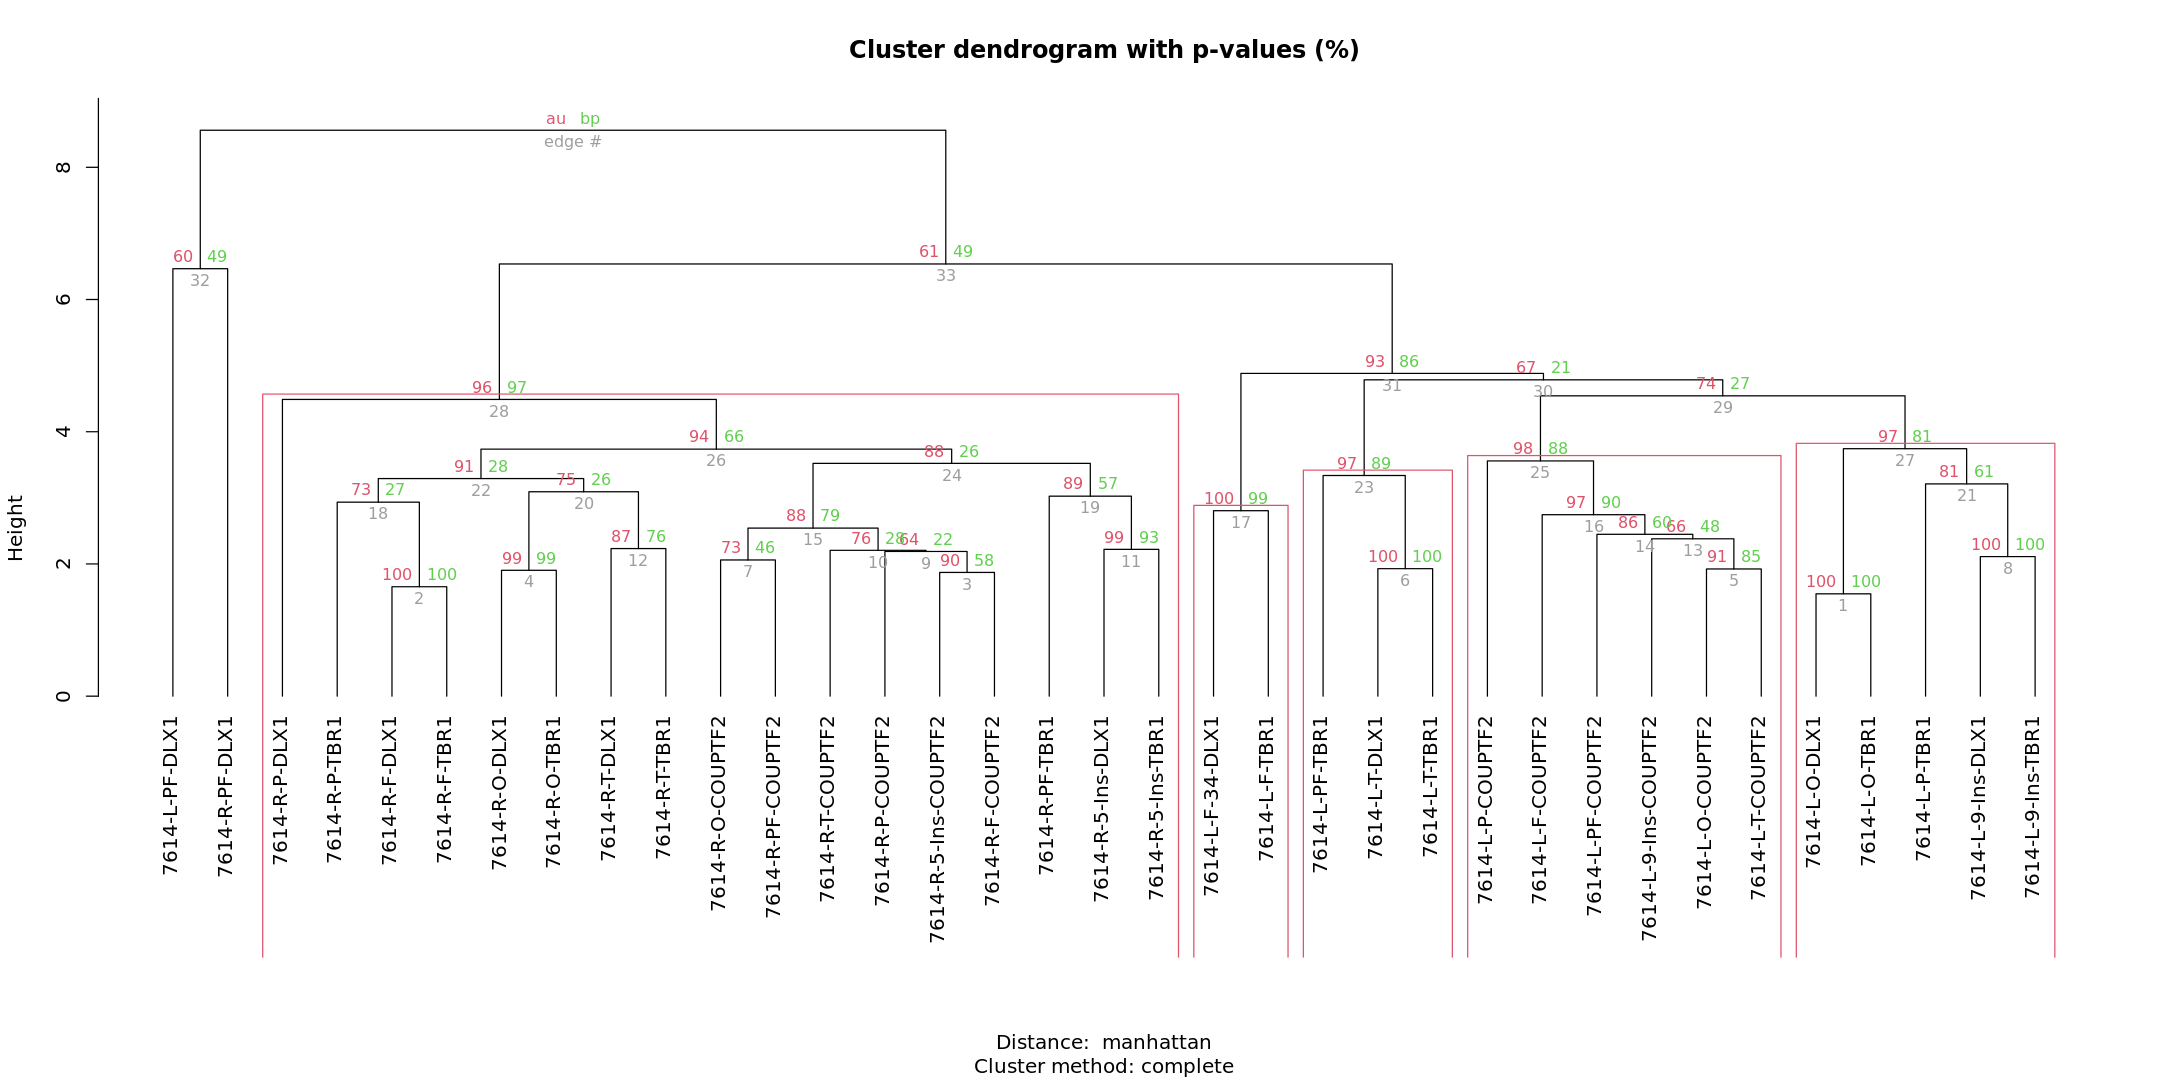

In [14]:
options(repr.plot.width=18, repr.plot.height=9)
plot(res.pv, hang = -1)
pvrect(res.pv)

In [15]:
pdf(file="7614_varXsample_CTX_sorted_heatmap_bootstrap.pdf",height=9,width=18)
plot(res.pv, hang = -1)
pvrect(res.pv)
dev.off() 

png 
  2

In [9]:
myCol<-as.data.frame(t(na.omit(t(casted_MAF_VarBySample2[,1:4]))))
myCol$Hemisphere_col[myCol$Hemisphere %in% c("R")]<-"Red"
myCol$Hemisphere_col[myCol$Hemisphere %in% c("L")]<-"Blue"
myCol$Region_col[myCol$Region %in% c("PF")]<-"#00998F"
myCol$Region_col[myCol$Region %in% c("F")]<-"#0075DC"
myCol$Region_col[myCol$Region %in% c("Ins")]<-"#993F00"
#myCol$Region_col[myCol$Region %in% c("PF")]<-"#00998F"
myCol$Region_col[myCol$Region %in% c("O")]<-"#FF5005"
myCol$Region_col[myCol$Region %in% c("P")]<-"#FFE100"
myCol$Region_col[myCol$Region %in% c("T")]<-"#2BCE48"
myCol$Cell_Type[myCol$Cell_Type %in% c("DLX1")]<-"#F06666"
myCol$Cell_Type[myCol$Cell_Type %in% c("COUPTF2")]<-"#5FBEEB"
myCol$Cell_Type[myCol$Cell_Type %in% c("TBR1")]<-"#7BBE42"
myCol2<-as.matrix(cbind(myCol$Hemisphere_col,myCol$Cell_Type,myCol$Region_col))
colnames(myCol2)<-c("Hemisphere","Cell_Type","Region")

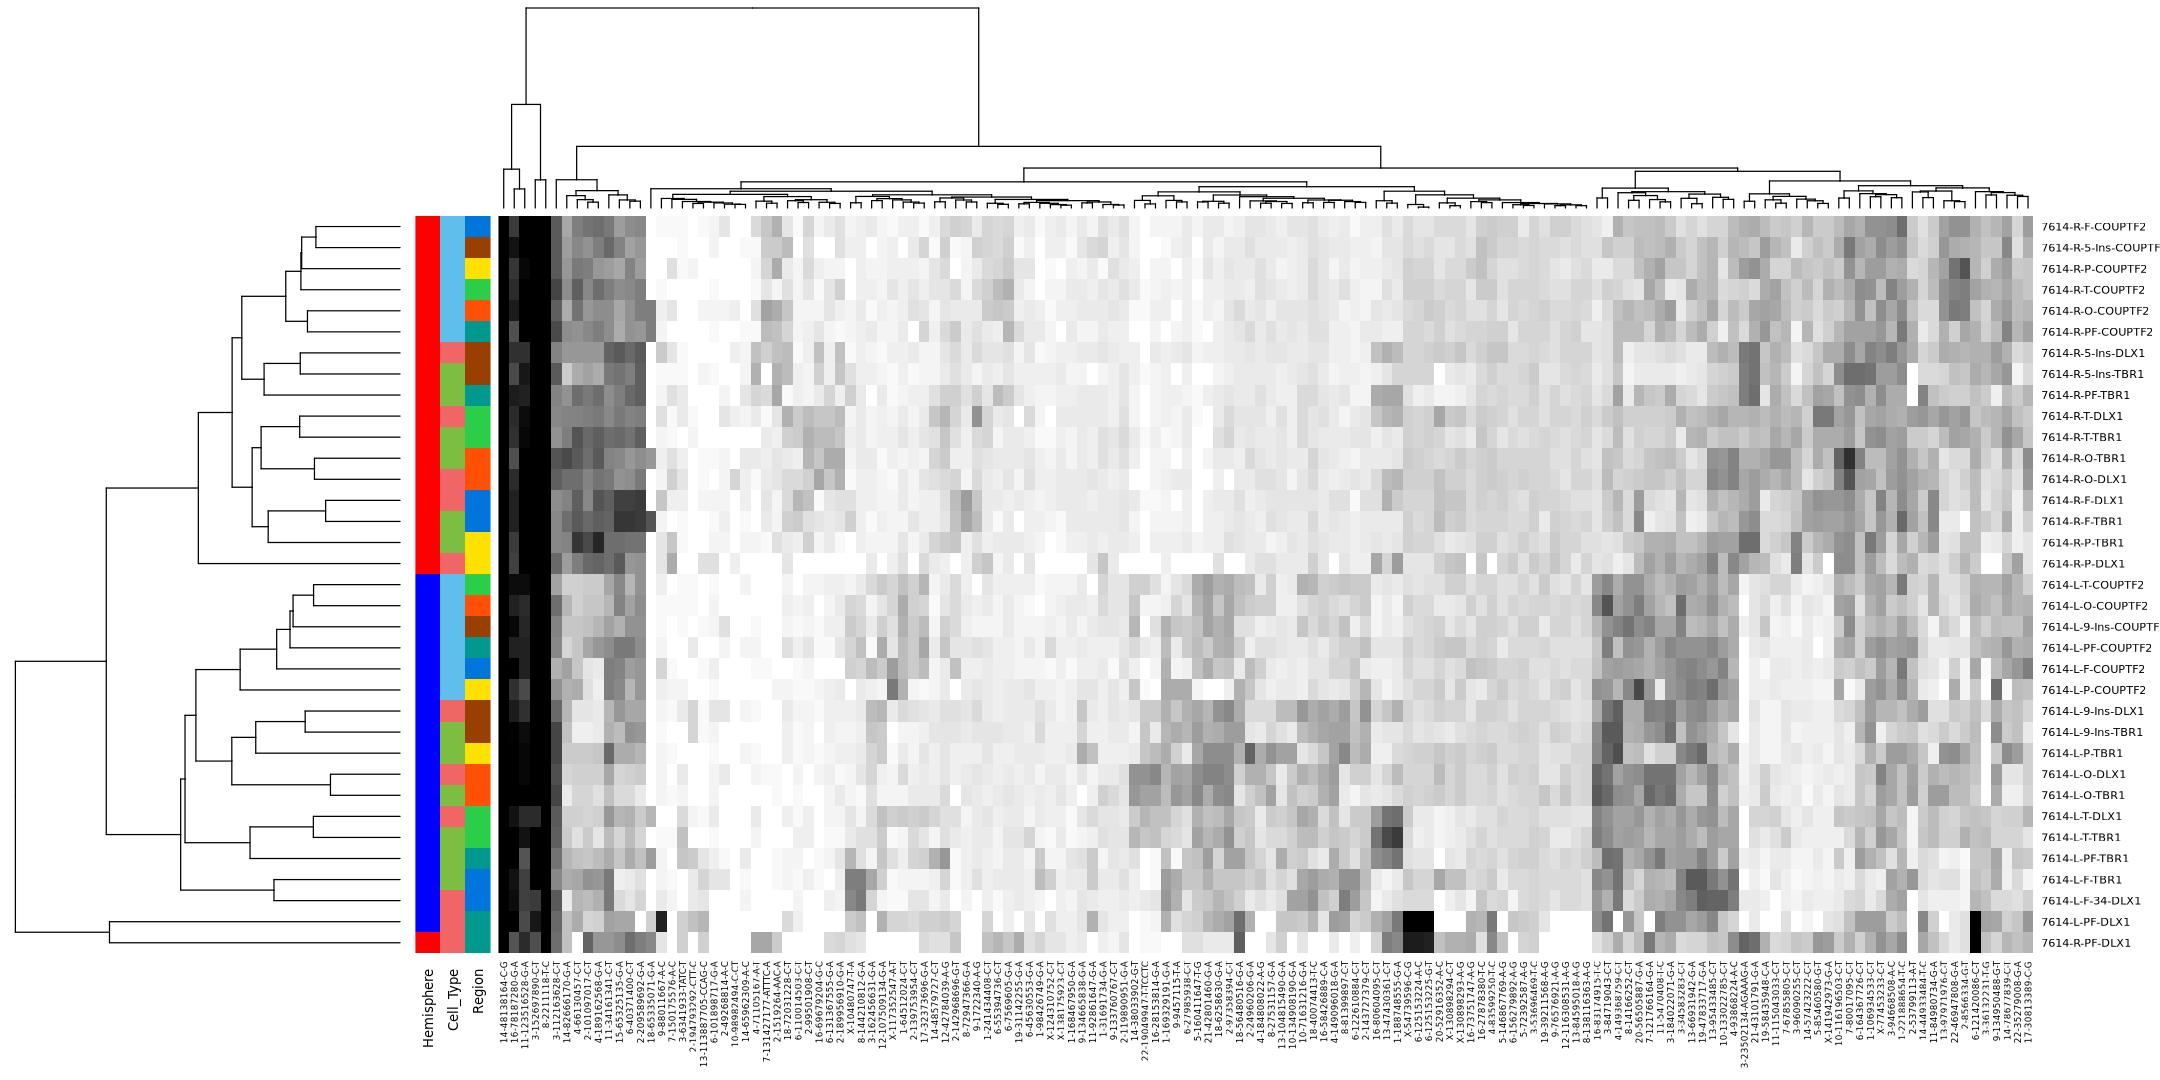

In [27]:
options(repr.plot.width=18, repr.plot.height=9)
Colors = c("white","Black","Black")
#Colors = c("white","black")
Colors = colorRampPalette(Colors)(100)
heatmap.plus(Normalized_casted_MAF_VarBySample2,
             distfun = function(x) dist(x,method = 'manhattan'),
             col=Colors, 
             RowSideColors=myCol2,
             margins=c(8,8),
             scale = c("none"))

In [28]:
pdf(file="7614_varXsample_CTX_sorted_heatmap_scalebar.pdf",height=27,width=54)
options(repr.plot.width=18, repr.plot.height=9)
# Colors = c("blue4","white","red4")
Colors = c("white","Black","Black")
Colors = colorRampPalette(Colors)(100)
heatmap.2(Normalized_casted_MAF_VarBySample2,
             distfun = function(x) dist(x,method = 'manhattan'),
             col=Colors, 
             #RowSideColors=myCol2,
             margins=c(8,8),
             scale = c("none"))
dev.off()               

png 
  2

In [29]:
pdf(file="7614_varXsample_CTX_sorted_heatmap.pdf",height=27,width=54)
# Colors = c("blue4","white","red4")
Colors = c("white","Black","Black")
Colors = colorRampPalette(Colors)(100)
heatmap.plus(Normalized_casted_MAF_VarBySample2,
             distfun = function(x) dist(x,method = 'manhattan'),
             col=Colors, 
             RowSideColors=myCol2,
             margins=c(8,8),
             scale = c("none"))
dev.off()               

png 
  2